In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt

Lectura de nuestro dataframe

In [2]:
df = pd.read_excel('C:/Users/User/OneDrive/Escritorio/Proyecto Final Accidente Vial/Datasets/df.xlsx')


Vemos a través del método de describe() todos los datos estadísticos básicos como la media, los cuartiles, el mínimo, máximo y la variación estandar

In [4]:
df.describe()

,n_victimas,franja_horaria,comuna,anio,mes,dia,edad
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,1.058528,11.561873,7.371237,2018.382943,6.560201,15.759197,42.665552
std,0.255432,6.629614,4.427262,1.626470,3.596791,8.679606,20.036613
min,1.000000,0.000000,1.000000,2016.000000,1.000000,1.000000,1.000000
25%,1.000000,6.000000,4.000000,2017.000000,3.000000,9.000000,27.000000
50%,1.000000,11.000000,7.500000,2018.000000,6.500000,16.000000,37.000000
75%,1.000000,17.000000,11.000000,2020.000000,10.000000,23.000000,57.000000
max,3.000000,23.000000,15.000000,2021.000000,12.000000,31.000000,95.000000


## OUTLIERS

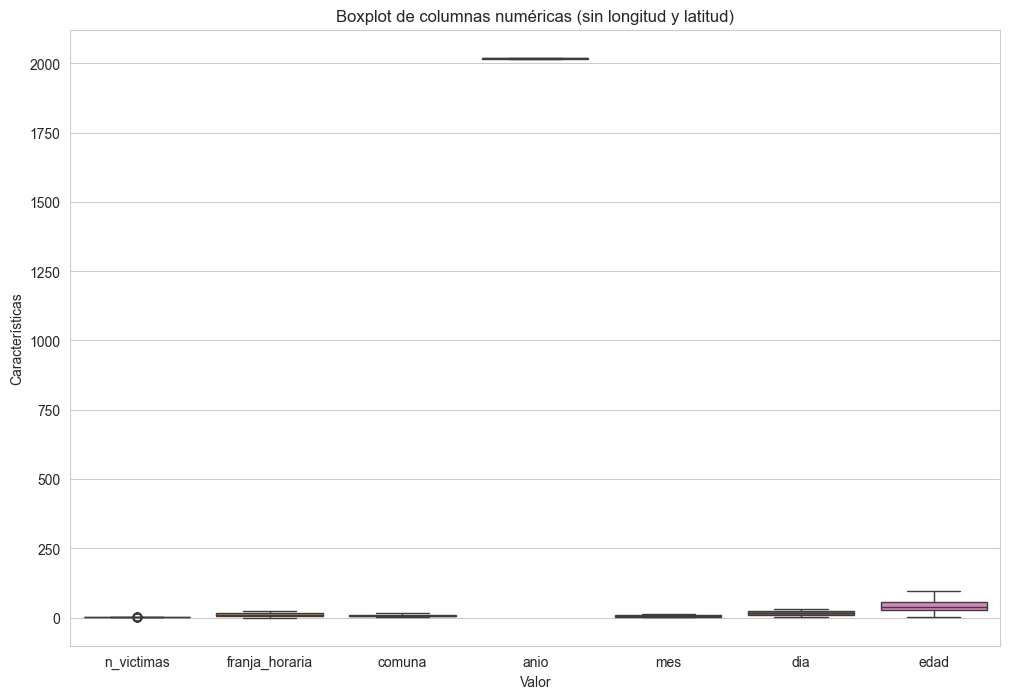

In [74]:
# Seleccionar todas las columnas numéricas excepto 'longitud' y 'latitud'
numericos = df.select_dtypes(include=[np.number]).drop(columns=['longitud', 'latitud'], errors='ignore')

# Crear el boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=numericos, orient='v')
plt.title('Boxplot de columnas numéricas (sin longitud y latitud)')
plt.xlabel('Valor')
plt.ylabel('Características')
plt.show()

Agarre todas las columnas numéricas (exceptuando latitud y longitud) y practicamente no hau outliers. Solamente en 'n_victimas' parece haber uno solo pero la verdad que no molesta para nada así que lo voy a dejar. Todo esto de los outliers se evitó en el trabajo de ETL limpiando lo que sería nuestro dataframe

Ahora mediante gráficos vamos a exponer en este EDA 

## EDADES

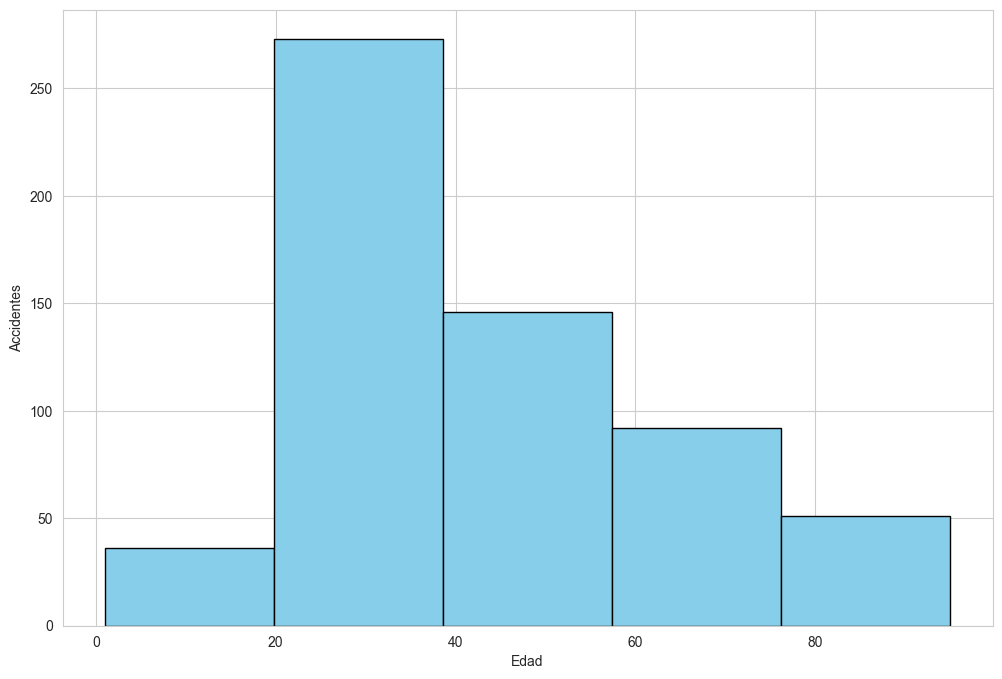

In [69]:
plt.figure(figsize=(12, 8))

plt.hist(df['edad'],bins=5,edgecolor='black',color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Accidentes')
plt.show()

Como se puede notar en en histograma, la mayor concentración de accidentes se concentra en el grupo etario de 20 a 39 años aproximadamente. Esto puede ocurrir con que es el grupo etario donde se concentra una gran mayoría de gente con actividad laboral activa y que puede llegar a estar más expuesto a un accidente vial debido a responsabilidades laborales como también a actividades lúdicas

## MESES

In [53]:
mes = df.groupby('mes')['n_victimas'].sum().reset_index()
mes = mes.sort_values(by = 'n_victimas', ascending = False)

Text(0, 0.5, 'Cantidad de victimas')

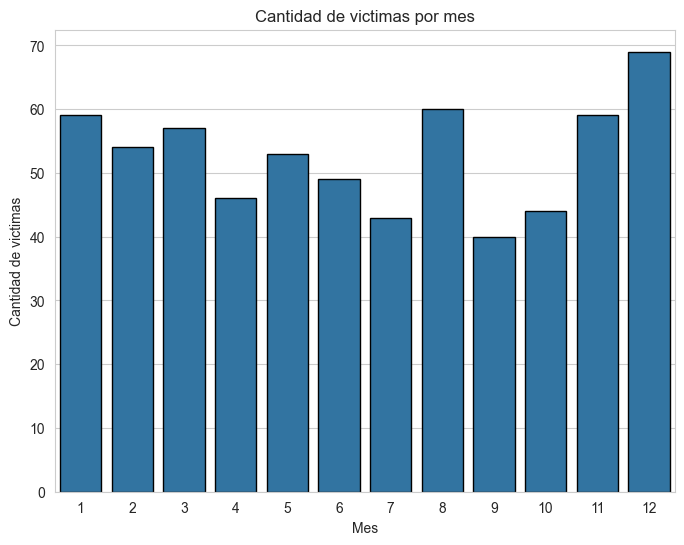

In [54]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='mes', y='n_victimas', edgecolor = 'black', data=mes)

# Añadir título y etiquetas
plt.title('Cantidad de victimas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de victimas')

El mes de Diciembre siempre suele tener mucho más accidentes que en otros meses. Esto debido a que es fin de año y por ende es muy cercano al inicio de vacaciones junto con las festividades como lo es Navidad y Año Nuevo (donde suelen haber fiestas en la noche de las mismas)

## DIA DE SEMANA

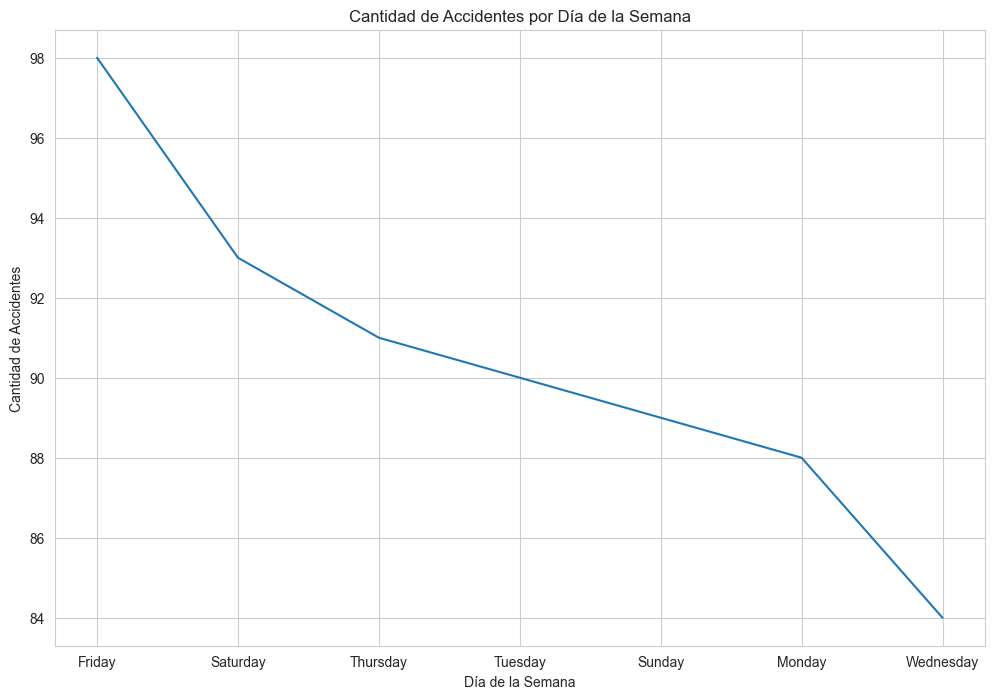

In [68]:

# Agrupar los datos por 'dia_semana' y contar los accidentes
accidentes = df.groupby('dia_semana')['n_victimas'].sum().reset_index()
accidentes = accidentes.sort_values(by='n_victimas',ascending=False)
# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(x='dia_semana', y='n_victimas', data=accidentes)

# Etiquetas de los ejes y título
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes por Día de la Semana')

# Mostrar el gráfico
plt.show()

Se puede notar que los días Domingos (Sunday) hay una gran desaceleración en la cantidad de accidentes. Esto puede llegar a ser debido a que no es un día laborable.

## FRANJA HORARIA

In [56]:
horario = df.groupby('franja_horaria')['n_victimas'].sum().reset_index()

Text(0, 0.5, 'Cantidad de victimas')

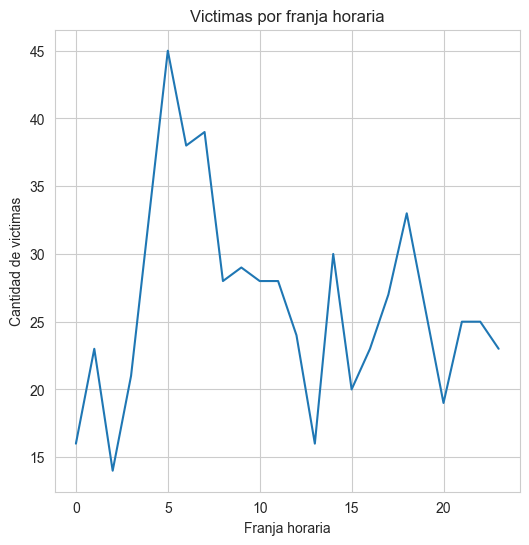

In [67]:

# Crear la gráfica de serie de tiempo
plt.figure(figsize=(6, 6))
sns.lineplot(x='franja_horaria', y='n_victimas', data=horario)

# Añadir título y etiquetas
plt.title('Victimas por franja horaria')
plt.xlabel('Franja horaria')
plt.ylabel('Cantidad de victimas')

Se puede ver en esta gráfico que la mayoría de accidentes ocurren en la madrugada y esto puede deberse a dos factores. El primero es debido al ingreso laboral debido a que mucha gente viven en provincia de Buenos Aires y tiene acceso a CABA mediante la avenidad General Paz (Comuna 8) sumado a la gente que vive en CABA y se moviliza desde ahí. El segundo factor que puede llegar a ser es por la vuelta de bares y boliches bailables (en Argentina se suele terminar la noche a eso de las 5:00 AM)

## LUGARES COMUNES

In [58]:
lugar = df.groupby('calle')['n_victimas'].sum().reset_index()
lugar= lugar.sort_values(by = 'n_victimas', ascending = False).head(5)

Text(0, 0.5, 'Tipo de calle')

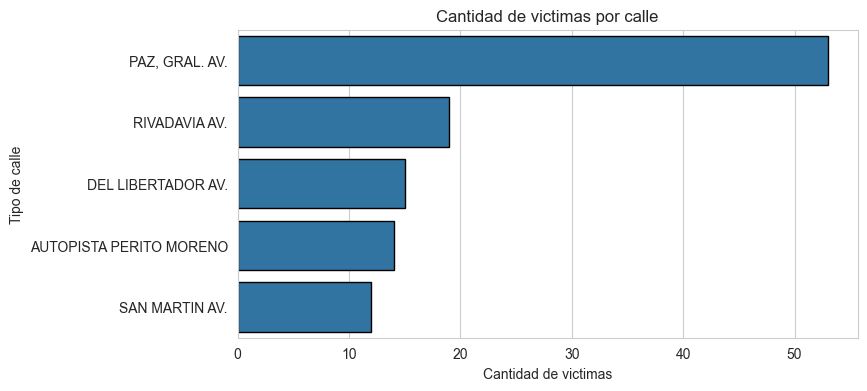

In [61]:
# Crear el gráfico de barras 
plt.figure(figsize=(8, 4))
sns.barplot(x='n_victimas', y='calle', data=lugar, edgecolor = 'black')

# Añadir título y etiquetas
plt.title('Cantidad de victimas por calle')
plt.xlabel('Cantidad de victimas')
plt.ylabel('Tipo de calle')

Como mencione anteriormente en el gráfico de las franjas horarias la Avenida General Paz es el lugar donde más accidentes hay.

In [ ]:
pip install folium

In [39]:
# Importación de folium para utilizarlo
import folium
from folium.plugins import HeatMap

In [3]:
#vamos a poner momentaneamente los valores de longitud y latitud en float
df['longitud'] = pd.to_numeric(df['longitud'], errors='coerce')
df['latitud'] = pd.to_numeric(df['latitud'], errors='coerce')
df['longitud'] = df['longitud'].astype('float64')
df['latitud'] = df['latitud'].astype('float64')

In [42]:
# Crear un mapa centrado en las coordenadas promedio
m = folium.Map(location=[df['latitud'].mean(), df['longitud'].mean()], zoom_start=12)

# Preparar los datos para el HeatMap
heat_data = df[['latitud', 'longitud']].dropna().values.tolist()

# Crear el HeatMap
HeatMap(heat_data).add_to(m)

m

Con la importación de la librería Folium usted puede manipular el mapa y ver cuales son los lugares donde más accidente hay. A simple viste se puede ver que en la zona sur de Ciudad Autónoma de Buenos Aires es donde más accidentes hay

Sino otra manera de graficarlo para que sea más fácil es a través de este gráfico de barras

In [43]:
comunas = df.groupby('comuna')['n_victimas'].sum().reset_index()
comunas = comunas.sort_values(by= 'n_victimas', ascending=False)

Text(0, 0.5, 'Cantidad de victimas')

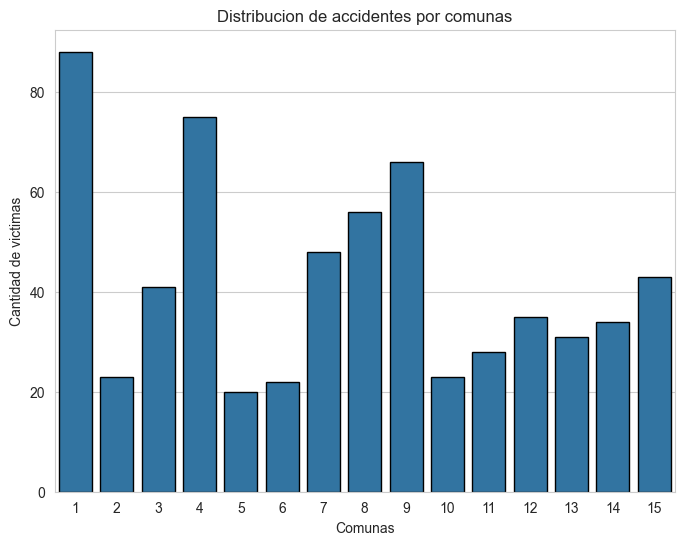

In [55]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='comuna', y='n_victimas', edgecolor = 'black', data=comunas)

# Añadir título y etiquetas
plt.title('Distribucion de accidentes por comunas')
plt.xlabel('Comunas')
plt.ylabel('Cantidad de victimas')

Para una mejor lectura de comunas aquí le proporciono información de los nombres de estas mismas

* 1 Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución.
* 2 Recoleta.
* 3 Balvanera y San Cristóbal.
* 4 La Boca, Barracas, Parque Patricios y Nueva Pompeya.
* 5 Almagro y Boedo.
* 6 Caballito.
* 7 Flores y Parque Chacabuco.
* 8 Villa Soldati, Villa Riachuelo y Villa Lugano.
* 9 Liniers, Mataderos y Parque Avellaneda.
* 10 Villa Real, Monte Castro, Versalles, Floresta, Vélez Sarsfield y Villa Luro.
* 11 Villa General Mitre, Villa Devoto, Villa del Parque y Villa Santa Rita.
* 12 Coghlan, Saavedra, Villa Urquiza y Villa Pueyrredón.
* 13 Núñez, Belgrano y Colegiales.
* 14  Palermo.
* 15 Chacarita, Villa Crespo, La Paternal, Villa Ortúzar, Agronomía y Parque Chas.

## TIPO DE VICTIMAS

In [48]:
tipo_victima = df.groupby('victima')['n_victimas'].sum().reset_index()
tipo_victima = tipo_victima.sort_values(by='n_victimas', ascending= False)

Text(0, 0.5, 'Tipo de victima')

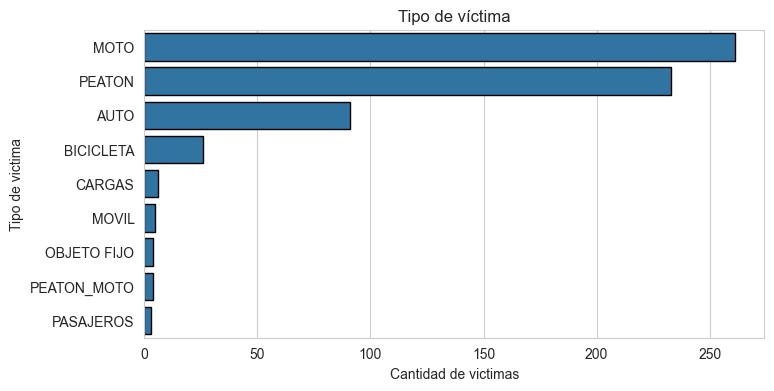

In [52]:


# Crear el gráfico de barras 
plt.figure(figsize=(8, 4))
sns.barplot(x='n_victimas', y='victima', data=tipo_victima, edgecolor = 'black')

# Añadir título y etiquetas
plt.title('Tipo de víctima')
plt.xlabel('Cantidad de victimas')
plt.ylabel('Tipo de victima')

Se puede ver que en MOTO hay una cantidad bastante considerable debido a que es un vehículo que no tiene respaldo alguno ante un eventual accidente

## PARTICIPANTES

In [63]:
participantes = df.groupby('participantes')['n_victimas'].sum().reset_index()
participantes = participantes.sort_values(by= 'n_victimas',ascending= False).head(5)

Text(0, 0.5, 'Participantes')

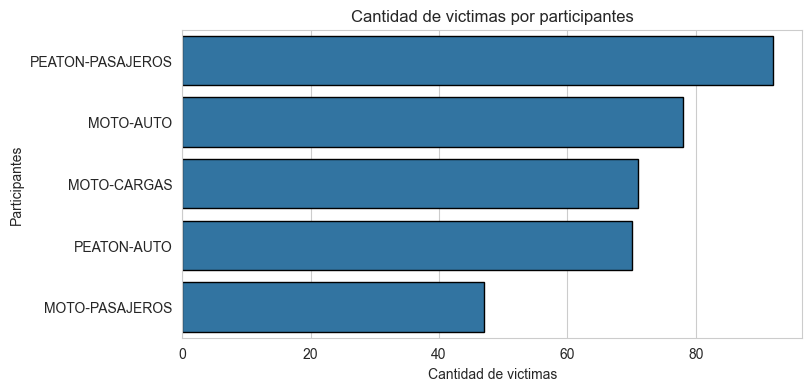

In [66]:
# Crear el gráfico de barras 
plt.figure(figsize=(8, 4))
sns.barplot(x='n_victimas', y='participantes', data=participantes, edgecolor = 'black')

# Añadir título y etiquetas
plt.title('Cantidad de victimas por participantes')
plt.xlabel('Cantidad de victimas')
plt.ylabel('Participantes')

Hay una clara tendencia de problemas con las motos. En cuanto a peatones-pasajeros esto puede llegar a ser por total confianza de estos mismos o imprudencia (al igual que las motos)

# Conclusiones

Voy a hacer un breve repaso de lo que fui demostrando mediante los gráficos de una manera más general ya que en lo particular fui detallandolo en su respectivo gráfico.

Las conclusiones de manera general son:

* El rango de edad donde se registran más accidentes son entre los 20 hasta las 40 años aproximadamente.
* El mes que más accidentes es Diciembre.
* El dia con más accidentes es el día Viernes
* La hora con más accidentes es a las 5 de la mañana.
* La Avenida General Paz es el lugar donde mayor cantidad de accidentes hay registrados
* Las comunas 1, 4, 9 y 8 (el nombre de cada comuna está detallado en el respectivo gráfico) es donde hay más fallecimientos.
* Las motos son la víctima más frecuente en estos tipos de casos.
* Los participantes que más accidentes presencian en nuestra base de datos son Peaton-pasajeros y Moto-Auto.

Voy a exportar nuevamente el dataframe ya que lo voy a utilizar para Power BI.

In [4]:
data = df.to_excel('C:/Users/User/OneDrive/Escritorio/Proyecto Final Accidente Vial/Datasets/data.xlsx')